## Expolatory Data Analysis on Sales DataSet 

#### importing the necessary libraries

In [2]:
import seaborn as sns
import pandas as pd
import plotly.express as px
import calendar
import matplotlib.pyplot as plt
df=pd.read_csv('./data/sales_data.csv')

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### exploring the columns and dtypes

In [4]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [5]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


#### renaming the columns

In [7]:
df.rename(columns={'Order ID':'Order_ID','Quantity Ordered':'Quantity_Ordered',
                   'Price Each':'Price_Each','Order Date':'Order_Date','Purchase Address':'Purchase_Address'},inplace=True)

In [8]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### dropping the null and duplicate columns

In [9]:

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

#### creating new column of date and hour from orde_date col and setting the date as index 

In [10]:
df['Date']=df.Order_Date.apply(lambda x: x.split(" ")[0])
df['Hour']=df.Order_Date.map(lambda x: x.split(" ")[1].split(":")[0])
df.drop(columns="Order_Date",inplace=True)
df['Date']=pd.to_datetime(df['Date'],format="%m/%d/%y",errors='coerce')
df.set_index(df['Date'],drop=True,inplace=True)
df.sort_index()

,Order_ID,Product,Quantity_Ordered,Price_Each,Purchase_Address,Date,Hour
Date,,,,,,,
2019-01-01,144159,AA Batteries (4-pack),1,3.84,"269 Main St, Atlanta, GA 30301",2019-01-01,21
2019-01-01,144804,Wired Headphones,1,11.99,"628 Lake St, New York City, NY 10001",2019-01-01,07
2019-01-01,147019,Bose SoundSport Headphones,1,99.99,"560 Forest St, New York City, NY 10001",2019-01-01,22
2019-01-01,142451,AAA Batteries (4-pack),1,2.99,"232 12th St, Boston, MA 02215",2019-01-01,06
2019-01-01,145270,Google Phone,1,600,"392 4th St, Dallas, TX 75001",2019-01-01,07
...,...,...,...,...,...,...,...
2020-01-01,306809,Macbook Pro Laptop,1,1700,"326 14th St, Dallas, TX 75001",2020-01-01,02
2020-01-01,300362,USB-C Charging Cable,1,11.95,"581 River St, San Francisco, CA 94016",2020-01-01,00
2020-01-01,306928,ThinkPad Laptop,1,999.99,"762 Elm St, Boston, MA 02215",2020-01-01,03


#### now deleting the date col

In [11]:
df.drop(columns=['Date'],inplace=True)

#### alterting the dtypes and  Now you can convert the "Quantity Ordered" column to integers

In [12]:
df = df[pd.to_numeric(df['Quantity_Ordered'], errors='coerce').notnull()]
df['Quantity_Ordered'] = df['Quantity_Ordered'].astype(int);
df['Price_Each']=df['Price_Each'].astype(float,32)

In [13]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Purchase_Address,Hour
Date,,,,,,
2019-04-19,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",08
2019-04-07,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",22
2019-04-12,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",14
2019-04-12,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",14
2019-04-30,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",09


#### Print different products sold

In [14]:
df.Product.unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

#### how many months of data is there


In [15]:
df.tail()
# so there are 9 months of data

,Order_ID,Product,Quantity_Ordered,Price_Each,Purchase_Address,Hour
Date,,,,,,
2019-09-17,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",20
2019-09-01,259354,iPhone,1,700.00,"216 Dogwood St, San Francisco, CA 94016",16
2019-09-23,259355,iPhone,1,700.00,"220 12th St, San Francisco, CA 94016",07
2019-09-19,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",17
2019-09-30,259357,USB-C Charging Cable,1,11.95,"250 Meadow St, San Francisco, CA 94016",00


#### creating new col of total price

In [16]:
df['Total']=df['Quantity_Ordered']*df['Price_Each']

In [17]:
df.sort_index(inplace=True)

#### print the total sales of each month 

In [18]:
mon_sales=df.loc["2019-01":"2020-01"].resample('M')['Total'].agg(Total_Monthly_Sales=('sum'))
mon_sales

,Total_Monthly_Sales
Date,
2019-01-31,1812742.87
2019-02-28,2200078.08
2019-03-31,2804973.35
2019-04-30,3389217.98
2019-05-31,3150616.23
2019-06-30,2576280.15
2019-07-31,2646461.32
2019-08-31,2241083.37
2019-09-30,2094465.69


#### creating a new column of city from existing Purchase_Address col

In [19]:
df['City']=df['Purchase_Address'].map(lambda x: x.split(",")[1])

#### which was the most selling product

In [20]:
dta=df.Product.value_counts()
dta.nlargest(5)

Product
USB-C Charging Cable        21859
Lightning Charging Cable    21610
AAA Batteries (4-pack)      20612
AA Batteries (4-pack)       20558
Wired Headphones            18849
Name: count, dtype: int64

#### which city has heighest sales in past 5 months

In [21]:
sales=df.loc['2019-05':].groupby('City')['Total'].agg('sum')
sales

City
 Atlanta          1952553.83
 Austin           1295023.55
 Boston           2590868.22
 Dallas           1963373.16
 Los Angeles      3839061.77
 New York City    3281464.97
 Portland         1628133.35
 San Francisco    5769286.00
 Seattle          1938760.81
Name: Total, dtype: float64

#### in which hour the sales is maximum

In [22]:
df.groupby(df['Hour'])['Total'].agg(Total_Sales=('sum')).sort_values(by="Total_Sales",ascending=False).head()

,Total_Sales
Hour,
19,2411971.14
12,2314359.85
11,2296619.84
20,2280784.36
18,2218374.01


#### Weekly Sales of month jan

In [23]:
data=df.loc["2019-01-01":"2019-01-30"].resample('W')['Total'].agg('sum')
data

Date
2019-01-06    344678.73
2019-01-13    409389.43
2019-01-20    394921.11
2019-01-27    426020.17
2019-02-03    175350.30
Freq: W-SUN, Name: Total, dtype: float64

#### compare the sales of Google phone in each month

In [24]:
def nops(df):
    value=[]
    for i in range(1,10):
        value.append(df.loc[ (df.index.month==i ) & (df.Product=='Google Phone') ]['Order_ID'].count())
    date=pd.date_range(start="2019-01",end="2019-10",freq="M")
    new=pd.DataFrame({'Quantity':value},index=date)
    return new
new=nops(df)
new

,Quantity
2019-01-31,317
2019-02-28,379
2019-03-31,463
2019-04-30,580
2019-05-31,479
2019-06-30,391
2019-07-31,410
2019-08-31,359
2019-09-30,341


#### in each month which was most selling product

In [25]:
import calendar
def most_selling(df1):
    for i in range(1,13):
        product=(df1.loc[df1.index.month==i].Product.value_counts().nlargest(1).index.values[0])
        value=(df1.loc[df1.index.month==i].Product.value_counts().nlargest(1)[0])
        month=calendar.month_name[i]
        print(f' Most selling product in {month} is {product} and quantity sold is {value}')
most_selling(df)        


 Most selling product in January is USB-C Charging Cable and quantity sold is 1171
 Most selling product in February is USB-C Charging Cable and quantity sold is 1511
 Most selling product in March is USB-C Charging Cable and quantity sold is 1766
 Most selling product in April is Lightning Charging Cable and quantity sold is 2197
 Most selling product in May is Lightning Charging Cable and quantity sold is 1929
 Most selling product in June is Lightning Charging Cable and quantity sold is 1560
 Most selling product in July is Lightning Charging Cable and quantity sold is 1690
 Most selling product in August is AA Batteries (4-pack) and quantity sold is 1357
 Most selling product in September is USB-C Charging Cable and quantity sold is 1451
 Most selling product in October is USB-C Charging Cable and quantity sold is 2437
 Most selling product in November is USB-C Charging Cable and quantity sold is 2054
 Most selling product in December is USB-C Charging Cable and quantity sold is 29

#### order list where order id is same

In [26]:
new=df.loc[df.Order_ID.duplicated(keep=False)]
new
# new.loc[ (new.index.duplicated() & new.Order_ID.duplicated() & df.Purchase_Address.duplicated() )]

,Order_ID,Product,Quantity_Ordered,Price_Each,Purchase_Address,Hour,Total,City
Date,,,,,,,,
2019-01-01,144804,Wired Headphones,1,11.99,"628 Lake St, New York City, NY 10001",07,11.99,New York City
2019-01-01,144804,iPhone,1,700.00,"628 Lake St, New York City, NY 10001",07,700.00,New York City
2019-01-01,148450,Lightning Charging Cable,1,14.95,"761 Lakeview St, Dallas, TX 75001",12,14.95,Dallas
2019-01-01,148450,iPhone,1,700.00,"761 Lakeview St, Dallas, TX 75001",12,700.00,Dallas
2019-01-01,148074,USB-C Charging Cable,1,11.95,"6 Johnson St, Atlanta, GA 30301",11,11.95,Atlanta
...,...,...,...,...,...,...,...,...
2020-01-01,297817,Lightning Charging Cable,2,14.95,"519 13th St, New York City, NY 10001",00,29.90,New York City
2020-01-01,311386,Apple Airpods Headphones,1,150.00,"730 Pine St, San Francisco, CA 94016",00,150.00,San Francisco
2020-01-01,311386,iPhone,1,700.00,"730 Pine St, San Francisco, CA 94016",00,700.00,San Francisco


#### most sold combination item 

In [27]:
grouped=new.groupby('Order_ID').agg({'Product':lambda x: "+".join(x),"Total":'sum'})
grouped
data=grouped.Product.value_counts().head()
data
# so we can see that most sold combination is lightening charging cabel and iphone
# lets plot this thenb

Product
Lightning Charging Cable+iPhone      455
iPhone+Lightning Charging Cable      440
USB-C Charging Cable+Google Phone    436
Google Phone+USB-C Charging Cable    433
iPhone+Wired Headphones              191
Name: count, dtype: int64

#### which city has largest sales of iphone and which has lowest

In [28]:
iphone_sold=df.query('Product=="iPhone"').groupby('City')['Quantity_Ordered'].agg('sum')
iphone_sold

City
 Atlanta           544
 Austin            377
 Boston            752
 Dallas            519
 Los Angeles      1118
 New York City     881
 Portland          450
 San Francisco    1660
 Seattle           546
Name: Quantity_Ordered, dtype: int32

#### In year 2019, sales on weekend from each month

In [29]:
def weekend_sales(df1):
    sales=[]
    months=[]
    for i in range(1,13):
        sales.append(df1.loc[f'2019-{i}'].resample('W')['Total'].sum().values.sum())
        months.append(calendar.month_name[i])
#     print(months,sales)
    new_Df=pd.DataFrame({'Months':months,'Weekend Sales':sales})   
    return new_Df
new_Df=weekend_sales(df)
new_Df.sort_values(by='Weekend Sales',ascending=False)

,Months,Weekend Sales
11,December,4608295.70
9,October,3734777.86
3,April,3389217.98
10,November,3197875.05
4,May,3150616.23
2,March,2804973.35
6,July,2646461.32
5,June,2576280.15
7,August,2241083.37
1,February,2200078.08


## Visualization of Data

#### Analyze the daily sales in month of jan and feb

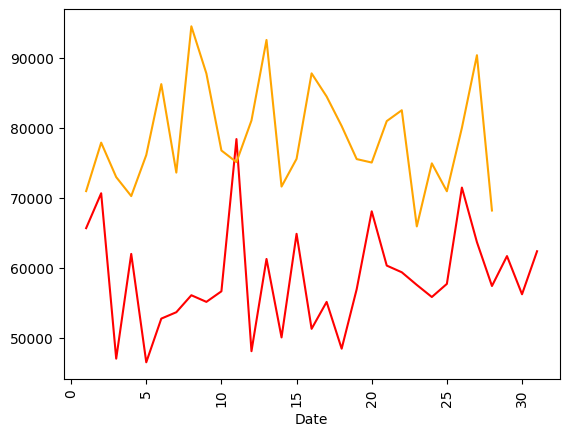

In [65]:
i=df.loc['2019-1'].resample('D')['Total'].agg('sum')
j=df.loc['2019-2'].resample('D')['Total'].agg('sum')
sns.lineplot(data=i,x=i.index.day,y=i.values,color='red')
sns.lineplot(data=j,x=j.index.day,y=j.values,color='orange')
plt.xticks(rotation=90);
# so the sales of febuary is greater than january

#### Monthly sales in each month

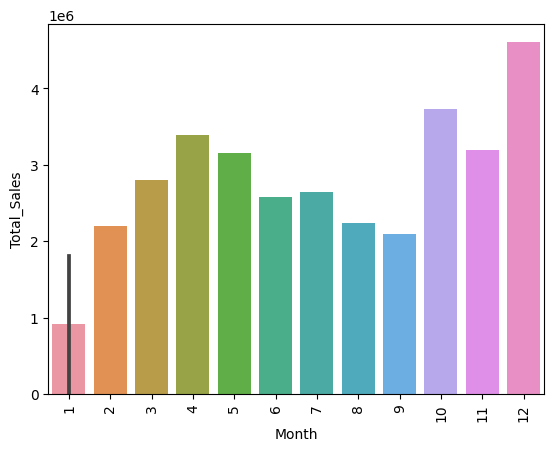

In [77]:
data=df.loc['2019-01':].resample('M')['Total'].agg(Total_Sales=('sum'))
sns.barplot(data=data,x=data.index.month,y='Total_Sales')
plt.xlabel("Month")
plt.xticks(rotation=90);

#### Comparing the total sales on weekend from each month

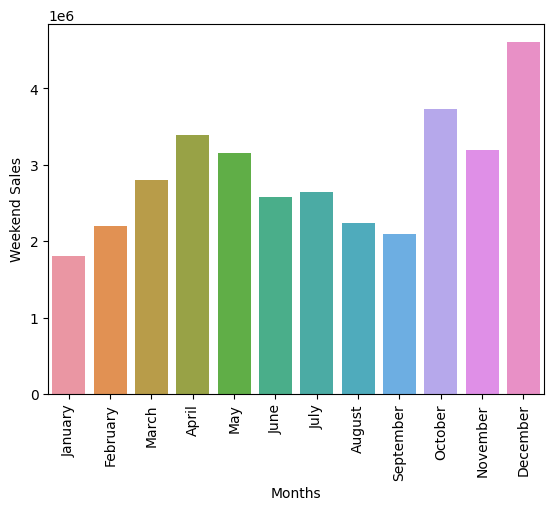

In [84]:
def weekend_sales(df1):
    sales=[]
    months=[]
    for i in range(1,13):
        sales.append(df1.loc[f'2019-{i}'].resample('W')['Total'].sum().values.sum())
        months.append(calendar.month_name[i])
#     print(months,sales)
    new_Df=pd.DataFrame({'Months':months,'Weekend Sales':sales})   
    return new_Df
new_Df=weekend_sales(df)
sns.barplot(data=new_Df,x='Months',y='Weekend Sales')
plt.xticks(rotation=90);

#### Which city has Heighest selling of iphones

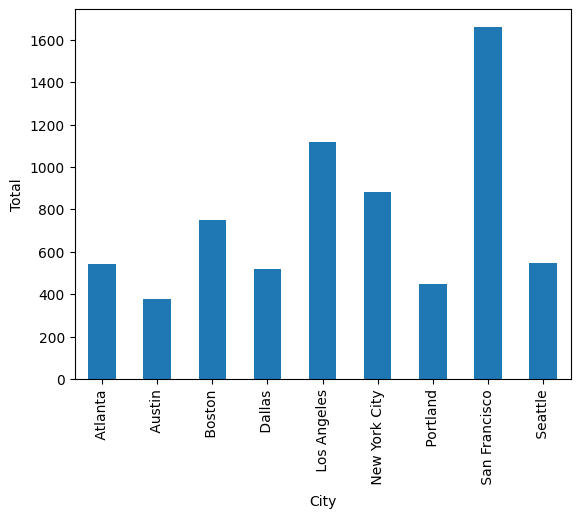

In [96]:
iphone_sold=df.query('Product=="iPhone"').groupby('City')['Quantity_Ordered'].agg('sum')
iphone_sold.plot(kind='bar')
plt.ylabel('Total');

In [116]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Purchase_Address,Hour,Total,City
Date,,,,,,,,
2019-01-01,144159,AA Batteries (4-pack),1,3.84,"269 Main St, Atlanta, GA 30301",21,3.84,Atlanta
2019-01-01,144804,Wired Headphones,1,11.99,"628 Lake St, New York City, NY 10001",07,11.99,New York City
2019-01-01,147019,Bose SoundSport Headphones,1,99.99,"560 Forest St, New York City, NY 10001",22,99.99,New York City
2019-01-01,142451,AAA Batteries (4-pack),1,2.99,"232 12th St, Boston, MA 02215",06,2.99,Boston
2019-01-01,145270,Google Phone,1,600.00,"392 4th St, Dallas, TX 75001",07,600.00,Dallas


#### In month of April , most sold products

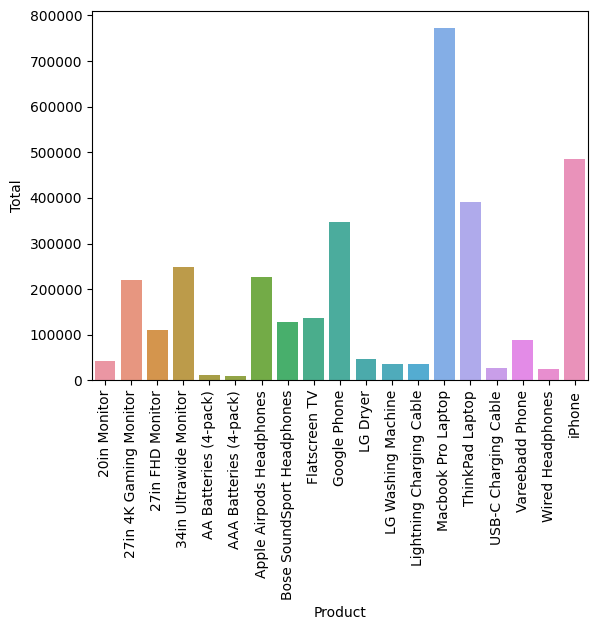

In [128]:
data=df.loc[df.index.month==4].groupby('Product')['Total'].agg(Total=('sum'))
sns.barplot(data=data,x=data.index,y=data['Total'])
plt.xticks(rotation=90);

#### Variation in sales of thinkpad laptop over different months

Text(0.5, 1.0, 'variation in sales of thinkpad and macbook')

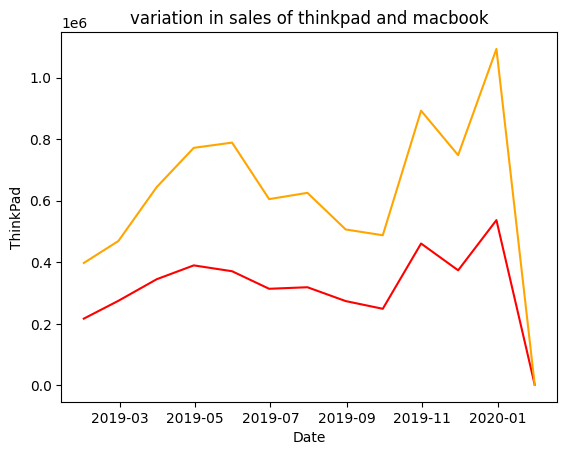

In [160]:
data1=df.query('Product=="ThinkPad Laptop"').resample('M')['Total'].agg(ThinkPad=('sum'))
data2=df.query('Product=="Macbook Pro Laptop"').resample('M')['Total'].agg(Macbook=('sum'))
data1=data1.join(data2)
sns.lineplot(data=data1,x=data.index,y='ThinkPad',color='red')
sns.lineplot(data=data1,x=data.index,y='Macbook',color='orange')
plt.title('variation in sales of thinkpad and macbook')